In [26]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import MinMaxScaler, StandardScaler

from triple_barrier import triple_barrier as tb
import ta
import getTA

In [2]:
df_ = pd.read_csv('C:ethusd5min.csv')
df = df_.set_index('timestamp')
df.index = pd.to_datetime(df.index)
df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2020-04-10 00:00:00,169.56,169.72,169.41,169.43,2906.41820,1586477099999,4.930542e+05,707,2260.79119,3.835677e+05,0
2020-04-10 00:05:00,169.44,169.59,168.92,169.22,3376.45186,1586477399999,5.711061e+05,1004,1951.63764,3.301054e+05,0
2020-04-10 00:10:00,169.23,169.42,168.70,168.78,3007.20677,1586477699999,5.081008e+05,752,929.71120,1.571687e+05,0
2020-04-10 00:15:00,168.84,169.12,168.80,169.00,1465.81110,1586477999999,2.476386e+05,472,637.17163,1.076405e+05,0
2020-04-10 00:20:00,168.99,169.40,168.96,169.36,1067.16710,1586478299999,1.806507e+05,418,343.42918,5.811992e+04,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-09 23:40:00,2066.80,2069.36,2065.89,2067.74,696.35201,1618011899999,1.439804e+06,1078,350.52749,7.246912e+05,0
2021-04-09 23:45:00,2067.75,2070.85,2067.62,2070.42,1039.88778,1618012199999,2.152313e+06,1344,554.96546,1.148618e+06,0
2021-04-09 23:50:00,2070.42,2070.95,2069.05,2069.52,773.88383,1618012499999,1.601904e+06,1142,428.07969,8.860856e+05,0


In [3]:
close = pd.to_numeric(df.close)

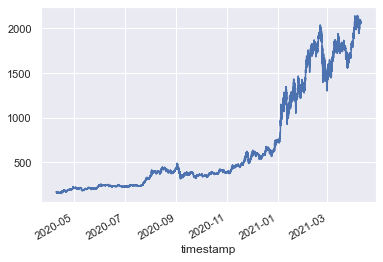

In [177]:
close.plot()

- Sharpe Ratio: $\frac{\mu}{\sigma} = \frac{p\pi+(1-p)(-\pi)}{\sqrt{2\pi p(1-p)}} = \frac{p -0.5}{\sqrt{p(1-p)}}$ 
- $p$ (probability of winning) is given by first model

Triple-Barrier

- why did I choose triple-barrier trading method?
    - I can fix profit and loss symmetrically

In [4]:
window = 14*5
rsi = ta.momentum.rsi(close,window)
where = (rsi>=55) & (rsi<=70)
enter = rsi[where].index

In [5]:
enter

DatetimeIndex(['2020-04-12 00:05:00', '2020-04-12 11:30:00',
               '2020-04-12 11:35:00', '2020-04-12 12:00:00',
               '2020-04-12 12:05:00', '2020-04-12 12:10:00',
               '2020-04-12 12:15:00', '2020-04-12 12:20:00',
               '2020-04-12 12:25:00', '2020-04-12 12:30:00',
               ...
               '2021-04-09 01:30:00', '2021-04-09 01:40:00',
               '2021-04-09 02:35:00', '2021-04-09 02:40:00',
               '2021-04-09 10:10:00', '2021-04-09 10:15:00',
               '2021-04-09 10:20:00', '2021-04-09 10:25:00',
               '2021-04-09 10:30:00', '2021-04-09 10:35:00'],
              dtype='datetime64[ns]', name='timestamp', length=19059, freq=None)

In [6]:
pt_sl = [0.05,0.05]

$\pi=0.05$

In [18]:
max_holding = [360,0]

barrier = tb.get_barrier(close,enter,pt_sl,max_holding=max_holding,target=None)

In [19]:
barrier

,exit,price,ret,side
timestamp,,,,
2020-04-12 00:05:00,2020-04-13 09:40:00,159.23,-0.053401,1.0
2020-04-12 11:30:00,2020-04-16 00:15:00,158.51,-0.053184,1.0
2020-04-12 11:35:00,2020-04-16 00:15:00,158.61,-0.053815,1.0
2020-04-12 12:00:00,2020-04-16 00:15:00,158.77,-0.054823,1.0
2020-04-12 12:05:00,2020-04-13 09:40:00,158.94,-0.051578,1.0
...,...,...,...,...
2021-04-09 10:15:00,NaT,2097.55,0.000000,1.0
2021-04-09 10:20:00,NaT,2099.12,0.000000,1.0
2021-04-09 10:25:00,NaT,2095.15,0.000000,1.0


**we will see 2021 only**

In [87]:
returns = barrier.ret
returns = returns[returns!=0]

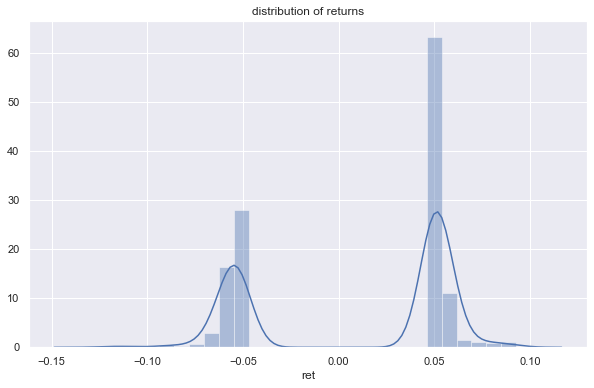

In [88]:
plt.figure(figsize=(10,6))
seaborn.distplot(returns)
plt.title('distribution of returns')
plt.show()

In [180]:
y_ = np.sign(returns).rename('pnl')
y_test = y_.iloc[-1000:]
y_test.value_counts()
#profit and loss

 1.0    606
-1.0    394
Name: pnl, dtype: int64

In [181]:
p = y_test.value_counts().iloc[0]/(y_test.value_counts().iloc[0]+y_test.value_counts().iloc[1])
print('Probabilities of winning (p): ',p)

Probabilities of winning (p):  0.606


In [182]:
asr = np.sqrt(len(y_test))*(p-0.5)/np.sqrt(p*(1-p))
print('Annualized Sharpe Ratio: ',asr)

Annualized Sharpe Ratio:  6.859957771216559


# Adjust Sharpe ratio by meta-labeling

- drop loss-predicted bets
- prediction by Machine Learning method (Random Forest Classifier)

- NEED precision score > probability of winning of 1st model

### X
- 21 technical indicators features

In [37]:
df_ = df.iloc[:,:5]

In [156]:
TI = getTA.get_ta(df_).shift(1).iloc[:,4:].dropna()

In [157]:
TI

,volume,m_rsi,m_roc,m_cmo,m_wr,vm_cmf,vm_mfi,vm_fi,vm_eom,vl_bbp,vl_atr,t_macdd,t_trix,t_cci,t_dpo,t_kst,t_adx
timestamp,,,,,,,,,,,,,,,,,
2020-04-10 03:40:00,30473.22518,24.153181,-1.069359,-42.690,-82.507289,-0.214651,21.012617,-6819.192396,-8925.868476,-0.311615,0.650566,-0.150505,-0.032532,-300.893176,-0.1735,-28.839048,44.303134
2020-04-10 03:45:00,7905.56877,30.483021,-1.037072,-26.112,-69.679300,-0.116038,31.280292,-5348.100588,-1147.924996,-0.044477,0.643383,-0.183712,-0.036226,-231.579158,-0.1365,-9.549022,46.130866
2020-04-10 03:50:00,10105.91926,27.404310,-1.311945,-42.964,-85.714286,-0.142446,30.152914,-5378.122731,-2399.583786,-0.083090,0.666712,-0.226040,-0.040792,-215.144150,0.1720,-10.576129,48.040671
2020-04-10 03:55:00,21052.78551,20.299027,-2.448907,-56.633,-83.658970,-0.177688,21.134356,-9933.166677,-18399.465468,-0.245078,0.824804,-0.349208,-0.047720,-259.054846,0.8355,-12.338119,50.487342
2020-04-10 04:00:00,10853.38928,19.236899,-2.900446,-61.773,-89.875666,-0.198880,16.834231,-9056.812330,-5933.630347,-0.138776,0.831604,-0.425172,-0.056254,-223.416893,0.8590,-14.564377,52.759252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-09 23:40:00,750.04938,44.324577,-0.211474,-29.486,-46.505782,0.048958,43.042871,-347.266785,715092.918282,0.402178,4.536992,-0.007975,-0.018536,-32.456997,2.5085,-4.730109,25.476123
2021-04-09 23:45:00,696.35201,46.907260,-0.161269,-17.321,-36.582694,0.002936,42.766729,-204.147118,747466.787667,0.472621,4.460778,0.245158,-0.018359,-7.577335,0.1310,-4.669087,24.662763
2021-04-09 23:50:00,1039.88778,53.526453,0.100564,-2.941,-10.539523,0.052692,48.652740,223.145221,500082.807012,0.652595,4.372866,0.585249,-0.017613,32.839129,0.0590,-4.461090,23.365019


In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
TI_norm = pd.DataFrame(scaler.fit_transform(TI),index=TI.index)

In [184]:
from sklearn.decomposition import PCA
pca = PCA(8)
TI_pc = pd.DataFrame(pca.fit_transform(TI_norm),index=TI.index)
TI_pc

,0,1,2,3,4,5,6,7
timestamp,,,,,,,,
2020-04-10 03:40:00,5.803148,2.436308,2.212780,3.875526,-0.474828,-0.982681,0.872002,3.798297
2020-04-10 03:45:00,3.958249,0.865602,-0.010403,1.498914,-0.383745,-1.648866,0.492750,0.520263
2020-04-10 03:50:00,4.637972,0.922638,0.222169,1.825615,-0.521464,-1.700395,0.534419,0.735843
2020-04-10 03:55:00,6.148734,1.478858,1.792590,2.782167,-0.728106,-1.617876,0.672919,2.327900
2020-04-10 04:00:00,6.383151,1.372005,0.523317,1.633425,-0.765664,-1.973847,0.617166,0.764420
...,...,...,...,...,...,...,...,...
2021-04-09 23:40:00,1.130850,0.528474,-0.481391,-0.360916,-1.426942,0.258497,-0.544105,-0.314237
2021-04-09 23:45:00,0.561475,0.854017,-0.722646,-0.289583,-1.186912,0.399787,-0.061955,-0.195040
2021-04-09 23:50:00,-0.730273,1.167703,-0.436523,-0.615788,-0.676435,0.370007,-0.229717,-0.239634


In [185]:
tmp = TI_pc.join(y_).dropna()
X = tmp.iloc[:,:-1]
y = tmp.iloc[:,-1]

In [193]:
X_train = X.iloc[:-1000]
X_test = X.iloc[-1000:]

y_train = y.iloc[:-1000]
y_test = y.iloc[-1000:]

In [194]:
X_test

,0,1,2,3,4,5,6,7
timestamp,,,,,,,,
2021-03-18 01:50:00,0.848697,-0.857185,-0.342890,0.279861,1.974335,1.420483,-0.022626,-0.823150
2021-03-18 02:00:00,-2.190342,0.541834,-0.176185,-1.097706,-1.228843,1.801033,0.409762,-0.179160
2021-03-18 02:10:00,-2.120593,0.269850,-0.049740,-0.720698,0.380495,1.424886,0.085391,-0.497389
2021-03-18 02:15:00,-3.601124,0.915501,0.146115,-1.141983,-1.032296,1.584279,0.412312,-0.188788
2021-03-18 02:20:00,-3.049066,0.494241,0.091714,-0.788360,-0.024474,1.291781,0.093161,-0.463016
...,...,...,...,...,...,...,...,...
2021-04-06 00:55:00,-4.108840,1.011093,-0.205462,1.665882,0.848608,0.798277,0.216724,-1.156325
2021-04-06 01:00:00,-5.132137,1.584889,-0.334789,1.652709,-1.449439,1.123660,0.847850,-0.358234
2021-04-06 01:05:00,-3.082528,0.616584,1.936388,0.783610,-1.861422,1.182496,0.732676,-1.302484


In [195]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(500,criterion='entropy',class_weight='balanced_subsample')
clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=500)

In [196]:
y_pred = clf.predict(X_test)
y_pred = pd.Series(y_pred, index=X_test.index).rename('y_pred')
y_pred.head()

timestamp
2021-03-18 01:50:00   -1.0
2021-03-18 02:00:00   -1.0
2021-03-18 02:10:00   -1.0
2021-03-18 02:15:00   -1.0
2021-03-18 02:20:00   -1.0
Name: y_pred, dtype: float64

In [197]:
from sklearn.metrics import precision_score


In [198]:
p2 = precision_score(y_test,y_pred)
print('Precision score (Probability of winning after drop predicted loss): {}'.format(p2))

Precision score (Probability of winning after drop predicted loss): 0.6193633952254642


In [199]:
# After drop predicted loss
y_2nd = y_test.drop(index=y_pred.loc[y_pred==-1].index)

y_2nd.value_counts()

 1.0    467
-1.0    287
Name: pnl, dtype: int64

In [200]:
p2 = y_2nd.value_counts().iloc[0]/(y_2nd.value_counts().iloc[0]+y_2nd.value_counts().iloc[1])
print('Probabilities of winning (p): ',p2)

Probabilities of winning (p):  0.6193633952254642


In [202]:
asr = np.sqrt(len(y_2nd))*(p2-0.5)/np.sqrt(p2*(1-p2))
print('Annualized Sharpe Ratio: ',asr)

Annualized Sharpe Ratio:  6.750388897167542


Results

- from first strategy, we get $p = \frac{P}{P+L}$
- after training and predict the PnL points, we drop predicted loss points (TN+FP),
thus we get $\hat{p} =  \frac{P-FL}{(P-FL) + (L-TL)} = \frac{TP+FL-FL}{(TP+FL-FL) + (TL+FP-TL)} = \frac{TP}{TP+FP}$
, which is the precision score of 2nd model.

- If $\hat{p}>p$, this helps.